In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read in the data
df = pd.read_csv(r"C:\Users\jhack\ALY6020\Week Five\letters.csv")

In [3]:
# examine the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [4]:
# observation counts for each number
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [5]:
# Separate features and labels
X = df.drop('label', axis=1)  # X = features (all pixel columns)
y = df['label']  # y = labels (the digits 0-9)

In [6]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target distribution in training set: \n{y_train.value_counts(normalize=True)}")

Training set shape: (33600, 45)
Test set shape: (8400, 45)
Target distribution in training set: 
label
1    0.111518
7    0.104792
3    0.103601
9    0.099702
2    0.099464
6    0.098512
0    0.098363
4    0.096964
8    0.096726
5    0.090357
Name: proportion, dtype: float64


In [7]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Fit the KNN model 
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [9]:
# Make predictions with the model
y_pred_knn = knn.predict(X_test_scaled)

In [10]:
# Model evauluation 
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.6445 (64.45%)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       827
           1       0.77      0.97      0.86       937
           2       0.62      0.63      0.62       835
           3       0.52      0.55      0.53       870
           4       0.63      0.52      0.57       814
           5       0.64      0.56      0.60       759
           6       0.87      0.88      0.88       827
           7       0.47      0.58      0.52       880
           8       0.63      0.46      0.53       813
           9       0.45      0.37      0.41       838

    accuracy                           0.64      8400
   macro avg       0.64      0.64      0.64      8400
weighted avg       0.64      0.64      0.64      8400



([<matplotlib.axis.XTick at 0x25ac02326c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

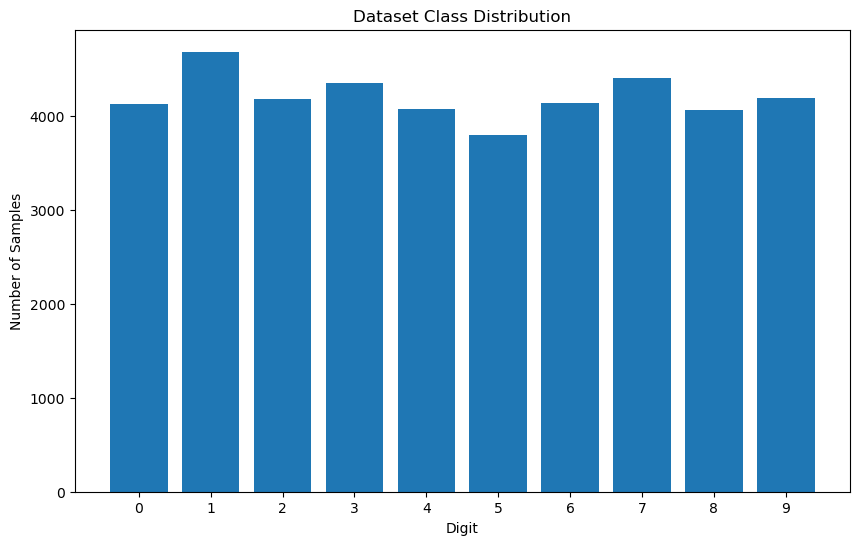

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), [y.value_counts()[i] for i in range(10)])
plt.title('Dataset Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.xticks(range(10))

In [12]:
# Re-scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print("Testing different k values:")
best_k = 5
best_accuracy = 0

for k in [1, 3, 5, 7, 9, 11, 15]:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    print(f"k={k}: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k={best_k} with accuracy: {best_accuracy:.4f}")

Testing different k values:
k=1: 0.6146 (61.46%)
k=3: 0.6310 (63.10%)
k=5: 0.6505 (65.05%)
k=7: 0.6585 (65.85%)
k=9: 0.6629 (66.29%)
k=11: 0.6631 (66.31%)
k=15: 0.6601 (66.01%)

Best k=11 with accuracy: 0.6631


In [14]:
# Train final model with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', n_jobs=-1)
final_knn.fit(X_train_scaled, y_train)
y_pred_knn = final_knn.predict(X_test_scaled)

print(f"\nFinal Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Final Results:
Accuracy: 0.6631

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       827
           1       0.77      0.97      0.86       937
           2       0.68      0.64      0.66       835
           3       0.57      0.59      0.58       870
           4       0.71      0.50      0.59       814
           5       0.68      0.55      0.61       759
           6       0.85      0.89      0.87       827
           7       0.47      0.66      0.55       880
           8       0.65      0.49      0.56       813
           9       0.46      0.41      0.43       838

    accuracy                           0.66      8400
   macro avg       0.67      0.66      0.66      8400
weighted avg       0.67      0.66      0.66      8400



In [15]:
knn_results = {
    'model': 'KNN',
    'accuracy': 0.6631 ,
    'best_digits': ['0', '1', '6'],  # >80% precision
    'worst_digits': ['7', '9'],      # <50% precision
    'training_time': 'Fast (lazy learning)',
    'prediction_time': 'Slow (calculates distances)',
    'interpretability': 'High (can see nearest neighbors)'
}
print(knn_results)

{'model': 'KNN', 'accuracy': 0.6631, 'best_digits': ['0', '1', '6'], 'worst_digits': ['7', '9'], 'training_time': 'Fast (lazy learning)', 'prediction_time': 'Slow (calculates distances)', 'interpretability': 'High (can see nearest neighbors)'}


In [16]:
# Neural Network Model 

In [17]:
# mlp.score for accuracry rating of neural network 
# solver has many different options
# trying different max interations will impact reuslts

# neural network setup
# mlp = MLPClassifier(3, solver='sgd', learning_rate_init = 0.01, max_iter=10000) sets model conditions
# mlp.fit(x_train, y_train) fits the model to the training data
# mlp.score(x_test, y_test) evauluates the model on the test data 

In [18]:
# Rescale data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# fit the model 
mlp = MLPClassifier(3, solver='sgd', learning_rate_init = 0.01, max_iter=10000) 
mlp.fit(X_train_scaled, y_train)

print(f"Results with sgd and 10,000 iterations")
print(f"Test accuracy: {mlp.score(X_test_scaled, y_test)}")

Results with sgd and 10,000 iterations
Test accuracy: 0.5230952380952381


In [20]:
# fit the model with improved hidden layer value 
mlp = MLPClassifier(100, solver='sgd', learning_rate_init = 0.01, max_iter=10000) 
mlp.fit(X_train_scaled, y_train)

print(f"Results with sgd and 10,000 iterations")
print(f"Test accuracy: {mlp.score(X_test_scaled, y_test)}")

Results with sgd and 10,000 iterations
Test accuracy: 0.6896428571428571


In [21]:
# fit the model with improved hidden layer value 
mlp = MLPClassifier(100, solver='sgd', learning_rate_init = 0.01, max_iter=20000) 
mlp.fit(X_train_scaled, y_train)

print(f"Results with sgd and 20,000 iterations")
print(f"Test accuracy: {mlp.score(X_test_scaled, y_test)}")

Results with sgd and 20,000 iterations
Test accuracy: 0.6970238095238095


In [22]:
# fit the model with improved hidden layer value 
mlp = MLPClassifier(100, solver='adam', learning_rate_init = 0.01, max_iter=20000) 
mlp.fit(X_train_scaled, y_train)

print(f"Results with adam and 20,000 iterations")
print(f"Test accuracy: {mlp.score(X_test_scaled, y_test)}")

Results with adam and 20,000 iterations
Test accuracy: 0.6829761904761905


In [23]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    solver='adam',                 
    learning_rate_init=0.001,      
    max_iter=10000,                 
    random_state=42,               
    early_stopping=True,           
    validation_fraction=0.1
)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=10000,
              random_state=42)

In [24]:
# 4. Evaluate
train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print(f"Results with two layers, adam, and 10,000 iterations")
print(f"Training accuracy: {train_score:.4f} ({train_score*100:.2f}%)")
print(f"Test accuracy: {test_score:.4f} ({test_score*100:.2f}%)")

Results with two layers, adam, and 10,000 iterations
Training accuracy: 0.7129 (71.29%)
Test accuracy: 0.6954 (69.54%)


In [25]:
# Apply PCA to reduce noise and focus on important features
from sklearn.decomposition import PCA
pca = PCA(n_components=30)  # Reduce from 45 to 30 most important features
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"   PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

   PCA explained variance: 97.4%


In [26]:
mlp_improved = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    solver='adam',
    learning_rate_init=0.001,
    max_iter=15000,                     # More iterations
    alpha=0.001,
    early_stopping=True,
    validation_fraction=0.15,
    random_state=42,
    batch_size='auto'
)

In [27]:
mlp_improved.fit(X_train_pca, y_train)

train_score = mlp_improved.score(X_train_pca, y_train)
test_score = mlp_improved.score(X_test_pca, y_test)

print(f"Improved MLP Results:")
print(f"   Training accuracy: {train_score:.4f} ({train_score*100:.2f}%)")
print(f"   Test accuracy: {test_score:.4f} ({test_score*100:.2f}%)")
print(f"   Iterations completed: {mlp_improved.n_iter_}")

Improved MLP Results:
   Training accuracy: 0.7269 (72.69%)
   Test accuracy: 0.6943 (69.43%)
   Iterations completed: 39


In [28]:
y_pred_nn = mlp_improved.predict(X_test_pca)

(0.0, 1.0)

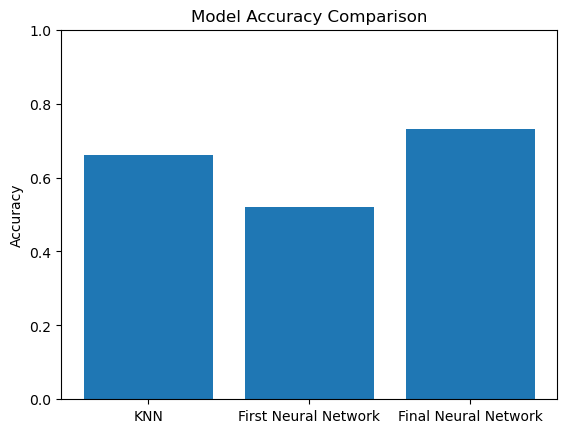

In [38]:
# Side-by-side accuracy comparison
models = ['KNN', 'First Neural Network', 'Final Neural Network']
accuracies = [0.66, 0.52, 0.73]  # Your results
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)


In [30]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"NN Accuracy: {nn_accuracy:.4f}")

KNN Accuracy: 0.6631
NN Accuracy: 0.6943


In [33]:
# Create confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

In [35]:
print(cm_knn)
print(cm_nn)

[[736   1  25   2  15   4  24  14   1   5]
 [  0 905   1   7   4   2   3   2   7   6]
 [ 52  25 535  64  26   9  14  36  57  17]
 [  6  34 100 509  15  45  13  23  89  36]
 [ 19  67   4  18 407  25  18 169   6  81]
 [ 13  32  17 124  20 419  36  38  20  40]
 [ 26  13  11  12  12   9 738   2   4   0]
 [  8   4   3  24  26  37   0 579   7 192]
 [ 16  85  80 106  18  30  22  28 400  28]
 [ 21   7   6  27  32  39   0 340  24 342]]
[[722   0  35   0  18   4  23  10   1  14]
 [  1 886   2   4   9   3   3   0  24   5]
 [ 30  16 529  81  19  11  13  29  78  29]
 [  3  18  73 512  18  63   4  13 117  49]
 [ 13  39   4  10 468  25  16 148  15  76]
 [ 10  17  11  80  19 479  30  30  42  41]
 [ 10   5   5   6  17  15 763   0   6   0]
 [  4   4   5  11  20  51   1 578  15 191]
 [ 10  45  49  97  13  28  14  20 498  39]
 [ 16   6   5  13  23  30   0 321  27 397]]


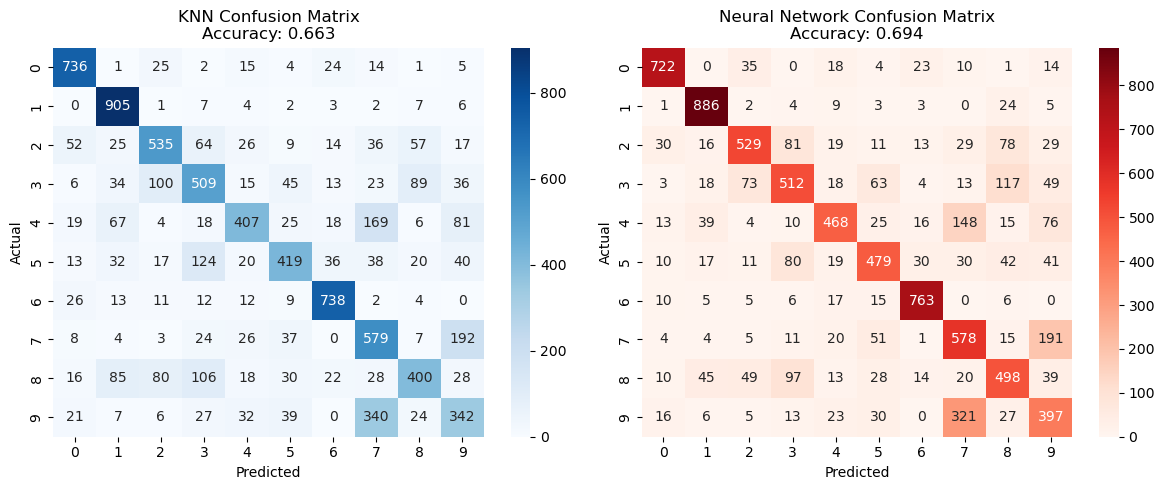

In [34]:
# Plot side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10), ax=ax1)
ax1.set_title(f'KNN Confusion Matrix\nAccuracy: {knn_accuracy:.3f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Neural Network Confusion Matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds',
            xticklabels=range(10), yticklabels=range(10), ax=ax2)
ax2.set_title(f'Neural Network Confusion Matrix\nAccuracy: {nn_accuracy:.3f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [37]:
# Calculate diagonal sums (correct predictions)
knn_correct = np.trace(cm_knn)  # Sum of diagonal elements
nn_correct = np.trace(cm_nn)

# Calculate total predictions
total_predictions = np.sum(cm_knn)  # Should be same for both matrices

# Calculate accuracies
knn_accuracy = knn_correct / total_predictions
nn_accuracy = nn_correct / total_predictions

print(f"KNN Diagonal Sum: {knn_correct:,} correct / {total_predictions:,} total = {knn_accuracy:.1%}")
print(f"NN Diagonal Sum: {nn_correct:,} correct / {total_predictions:,} total = {nn_accuracy:.1%}")
print(f"\nImprovement: {nn_accuracy - knn_accuracy:.1%} ({nn_correct - knn_correct:,} more correct predictions)")

KNN Diagonal Sum: 5,570 correct / 8,400 total = 66.3%
NN Diagonal Sum: 5,832 correct / 8,400 total = 69.4%

Improvement: 3.1% (262 more correct predictions)
